# Data Cleaning - Customers.csv 
#### The customers.csv is a file containing customer information. However, the data is very messy and needs to be cleaned. Here. we will perform exploratory data analysis and ensure our data becomes clean.

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [46]:
data = pd.read_csv("Skilharvest Projects/Customers.csv")

In [47]:
data.head()

,CustomerKey,Prefix,FirstName,LastName,Unnamed: 4,Unnamed: 5,Unnamed: 6,BirthDate,Unnamed: 8,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,Unnamed: 17,Unnamed: 18,BirthDate.1
0,11000,MR.,JON,YANG,MR. JON YANG,YANG,YANG,4/8/1966,NaN,M,M,jon24@learnsector.com,"$90,000",2,Bachelors,Professional,Y,NaN,NaN,14-05-1965
1,11001,MR.,EUGENE,HUANG,MR. EUGENE HUANG,HUANG,HUANG,14/05/1965,NaN,S,M,eugene10@learnsector.com,"$60,000",3,Bachelors,Professional,N,NaN,NaN,15-02-1968
2,11002,MR.,RUBEN,TORRES,MR. RUBEN TORRES,TORRES,TORRES,8/12/1965,NaN,M,M,ruben35@learnsector.com,"$60,000",3,Bachelors,Professional,Y,NaN,NaN,NaN
3,11003,MS.,CHRISTY,ZHU,MS. CHRISTY ZHU,ZHU,ZHU,15/02/1968,NaN,S,F,christy12@learnsector.com,"$70,000",0,Bachelors,Professional,N,NaN,NaN,NaN
4,11004,MRS.,ELIZABETH,JOHNSON,MRS. ELIZABETH JOHNSON,JOHNSON,JOHNSON,8/8/1968,NaN,S,F,elizabeth5@learnsector.com,"$80,000",5,Bachelors,Professional,Y,NaN,NaN,NaN


In [48]:
data.columns

Index(['CustomerKey', 'Prefix', 'FirstName', 'LastName', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'BirthDate', 'Unnamed: 8', 'MaritalStatus',
       'Gender', 'EmailAddress', 'AnnualIncome', 'TotalChildren',
       'EducationLevel', 'Occupation', 'HomeOwner', 'Unnamed: 17',
       'Unnamed: 18', 'BirthDate.1'],
      dtype='object')

In [49]:
data['Unnamed: 8'].isna().sum()

18148

In [50]:
data.shape
print("Our data has {} rows".format(data.shape[0]))
print("Our data has {} rows".format(data.shape[1]))

Our data has 18148 rows
Our data has 20 rows


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18148 entries, 0 to 18147
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerKey     18148 non-null  int64  
 1   Prefix          18018 non-null  object 
 2   FirstName       18148 non-null  object 
 3   LastName        18148 non-null  object 
 4   Unnamed: 4      18148 non-null  object 
 5   Unnamed: 5      18148 non-null  object 
 6   Unnamed: 6      46 non-null     object 
 7   BirthDate       18148 non-null  object 
 8   Unnamed: 8      0 non-null      float64
 9   MaritalStatus   18148 non-null  object 
 10  Gender          18018 non-null  object 
 11  EmailAddress    18148 non-null  object 
 12  AnnualIncome    18148 non-null  object 
 13  TotalChildren   18148 non-null  int64  
 14  EducationLevel  18148 non-null  object 
 15  Occupation      18148 non-null  object 
 16  HomeOwner       18148 non-null  object 
 17  Unnamed: 17     0 non-null     

In [52]:
"""observations
- drop Unnamed 8, prefix, firstname, lastname, unnamed 5, unnamed 6
- rename Unnamed 4 to full name
- convert birthdate to date format if it is not there yet
- let the values in marital status and gender be clearly descriptive
- convert AnnualIncome to string
- let homeowner be clearly descriptive
"""

'observations\n- drop Unnamed 8, prefix, firstname, lastname, unnamed 5, unnamed 6\n- rename Unnamed 4 to full name\n- convert birthdate to date format if it is not there yet\n- let the values in marital status and gender be clearly descriptive\n- convert AnnualIncome to string\n- let homeowner be clearly descriptive\n'

In [53]:
data.columns

Index(['CustomerKey', 'Prefix', 'FirstName', 'LastName', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'BirthDate', 'Unnamed: 8', 'MaritalStatus',
       'Gender', 'EmailAddress', 'AnnualIncome', 'TotalChildren',
       'EducationLevel', 'Occupation', 'HomeOwner', 'Unnamed: 17',
       'Unnamed: 18', 'BirthDate.1'],
      dtype='object')

In [54]:
data.drop(['Unnamed: 8', 'Prefix', 'FirstName', 'LastName', 'Unnamed: 5', 'Unnamed: 6'], axis = 1, inplace=True)

In [55]:
data.head()

,CustomerKey,Unnamed: 4,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,Unnamed: 17,Unnamed: 18,BirthDate.1
0,11000,MR. JON YANG,4/8/1966,M,M,jon24@learnsector.com,"$90,000",2,Bachelors,Professional,Y,NaN,NaN,14-05-1965
1,11001,MR. EUGENE HUANG,14/05/1965,S,M,eugene10@learnsector.com,"$60,000",3,Bachelors,Professional,N,NaN,NaN,15-02-1968
2,11002,MR. RUBEN TORRES,8/12/1965,M,M,ruben35@learnsector.com,"$60,000",3,Bachelors,Professional,Y,NaN,NaN,NaN
3,11003,MS. CHRISTY ZHU,15/02/1968,S,F,christy12@learnsector.com,"$70,000",0,Bachelors,Professional,N,NaN,NaN,NaN
4,11004,MRS. ELIZABETH JOHNSON,8/8/1968,S,F,elizabeth5@learnsector.com,"$80,000",5,Bachelors,Professional,Y,NaN,NaN,NaN


In [56]:
data.isnull().sum()

CustomerKey           0
Unnamed: 4            0
BirthDate             0
MaritalStatus         0
Gender              130
EmailAddress          0
AnnualIncome          0
TotalChildren         0
EducationLevel        0
Occupation            0
HomeOwner             0
Unnamed: 17       18148
Unnamed: 18       18148
BirthDate.1       18146
dtype: int64

In [57]:
# drop 'Unnamed: 17','Unnamed: 18', 'BirthDate.1'
data.drop(['Unnamed: 17','Unnamed: 18', 'BirthDate.1'], axis = 1, inplace = True)

In [58]:
data.tail()

,CustomerKey,Unnamed: 4,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
18143,29479,MR. TOMMY TANG,7/4/1958,M,M,tommy2@learnsector.com,"$30,000",1,Graduate Degree,Clerical,Y
18144,29480,MRS. NINA RAJI,11/10/1960,S,F,nina21@learnsector.com,"$30,000",3,Graduate Degree,Clerical,Y
18145,29481,MR. IVAN SURI,1/5/1960,S,M,ivan0@learnsector.com,"$30,000",3,Graduate Degree,Clerical,N
18146,29482,MR. CLAYTON ZHANG,3/5/1959,M,M,clayton0@learnsector.com,"$30,000",3,Bachelors,Clerical,Y
18147,29483,MR. JÉSUS NAVARRO,12/8/1959,M,M,jésus9@learnsector.com,"$30,000",0,Bachelors,Clerical,Y


In [59]:
data.rename(columns= {'Unnamed: 4' : 'Full_name'}, inplace = True)

In [60]:
data.head()

,CustomerKey,Full_name,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
0,11000,MR. JON YANG,4/8/1966,M,M,jon24@learnsector.com,"$90,000",2,Bachelors,Professional,Y
1,11001,MR. EUGENE HUANG,14/05/1965,S,M,eugene10@learnsector.com,"$60,000",3,Bachelors,Professional,N
2,11002,MR. RUBEN TORRES,8/12/1965,M,M,ruben35@learnsector.com,"$60,000",3,Bachelors,Professional,Y
3,11003,MS. CHRISTY ZHU,15/02/1968,S,F,christy12@learnsector.com,"$70,000",0,Bachelors,Professional,N
4,11004,MRS. ELIZABETH JOHNSON,8/8/1968,S,F,elizabeth5@learnsector.com,"$80,000",5,Bachelors,Professional,Y


In [61]:
data.MaritalStatus = data.MaritalStatus.str.replace('M', 'Married')
data.MaritalStatus = data.MaritalStatus.str.replace('S', 'Single')

In [62]:
data.head()

,CustomerKey,Full_name,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
0,11000,MR. JON YANG,4/8/1966,Married,M,jon24@learnsector.com,"$90,000",2,Bachelors,Professional,Y
1,11001,MR. EUGENE HUANG,14/05/1965,Single,M,eugene10@learnsector.com,"$60,000",3,Bachelors,Professional,N
2,11002,MR. RUBEN TORRES,8/12/1965,Married,M,ruben35@learnsector.com,"$60,000",3,Bachelors,Professional,Y
3,11003,MS. CHRISTY ZHU,15/02/1968,Single,F,christy12@learnsector.com,"$70,000",0,Bachelors,Professional,N
4,11004,MRS. ELIZABETH JOHNSON,8/8/1968,Single,F,elizabeth5@learnsector.com,"$80,000",5,Bachelors,Professional,Y


In [63]:
data.Gender = data.Gender.str.replace('M', 'Male')
data.Gender = data.Gender.str.replace('F', 'Female')

In [64]:
data.AnnualIncome = data.AnnualIncome.str.strip('$')

In [65]:
data.head()

,CustomerKey,Full_name,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
0,11000,MR. JON YANG,4/8/1966,Married,Male,jon24@learnsector.com,"90,000",2,Bachelors,Professional,Y
1,11001,MR. EUGENE HUANG,14/05/1965,Single,Male,eugene10@learnsector.com,"60,000",3,Bachelors,Professional,N
2,11002,MR. RUBEN TORRES,8/12/1965,Married,Male,ruben35@learnsector.com,"60,000",3,Bachelors,Professional,Y
3,11003,MS. CHRISTY ZHU,15/02/1968,Single,Female,christy12@learnsector.com,"70,000",0,Bachelors,Professional,N
4,11004,MRS. ELIZABETH JOHNSON,8/8/1968,Single,Female,elizabeth5@learnsector.com,"80,000",5,Bachelors,Professional,Y


In [66]:
data.AnnualIncome = data.AnnualIncome.str.replace(',', '')

In [67]:
data.head()

,CustomerKey,Full_name,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
0,11000,MR. JON YANG,4/8/1966,Married,Male,jon24@learnsector.com,90000,2,Bachelors,Professional,Y
1,11001,MR. EUGENE HUANG,14/05/1965,Single,Male,eugene10@learnsector.com,60000,3,Bachelors,Professional,N
2,11002,MR. RUBEN TORRES,8/12/1965,Married,Male,ruben35@learnsector.com,60000,3,Bachelors,Professional,Y
3,11003,MS. CHRISTY ZHU,15/02/1968,Single,Female,christy12@learnsector.com,70000,0,Bachelors,Professional,N
4,11004,MRS. ELIZABETH JOHNSON,8/8/1968,Single,Female,elizabeth5@learnsector.com,80000,5,Bachelors,Professional,Y


In [68]:
data.HomeOwner = data.HomeOwner.str.replace('Y', 'Yes')
data.HomeOwner = data.HomeOwner.str.replace('N', 'No')


In [69]:
data.isnull().sum()

CustomerKey         0
Full_name           0
BirthDate           0
MaritalStatus       0
Gender            130
EmailAddress        0
AnnualIncome        0
TotalChildren       0
EducationLevel      0
Occupation          0
HomeOwner           0
dtype: int64

In [70]:
data[data['Gender'].isnull() == True]

,CustomerKey,Full_name,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
24,11025,ALEJANDRO BECK,23/12/1945,Married,NaN,alejandro45@learnsector.com,10000,2,Partial High School,Clerical,Yes
34,11035,WENDY DOMINGUEZ,24/02/1948,Married,NaN,wendy12@learnsector.com,10000,2,Partial High School,Clerical,Yes
81,11082,ANGELA BUTLER,8/4/1966,Single,NaN,angela17@learnsector.com,130000,0,Graduate Degree,Management,No
228,11234,ANNA GRIFFIN,19/11/1952,Single,NaN,anna46@learnsector.com,70000,4,Partial College,Professional,Yes
464,11475,CESAR SUBRAM,10/9/1978,Single,NaN,cesar12@learnsector.com,30000,0,High School,Manual,No
...,...,...,...,...,...,...,...,...,...,...,...
17655,28981,LUKE JAI,17/03/1940,Single,NaN,luke21@learnsector.com,60000,3,Graduate Degree,Management,No
17673,28999,EDWARD MARTINEZ,24/10/1947,Married,NaN,edward40@learnsector.com,70000,2,Bachelors,Management,No
17806,29136,CAROLINE BRYANT,5/8/1964,Married,NaN,caroline19@learnsector.com,60000,4,Bachelors,Skilled Manual,Yes
18012,29345,RANDALL DIAZ,26/02/1942,Single,NaN,randall4@learnsector.com,40000,2,Bachelors,Management,No


In [71]:
data[81, 'Gender'] = 'Female'

In [72]:
data.iloc[81]

CustomerKey                          11082
Full_name                    ANGELA BUTLER
BirthDate                         8/4/1966
MaritalStatus                       Single
Gender                                 NaN
EmailAddress      angela17@learnsector.com
AnnualIncome                       130000 
TotalChildren                            0
EducationLevel             Graduate Degree
Occupation                      Management
HomeOwner                               No
(81, Gender)                        Female
Name: 81, dtype: object

In [73]:
data[data['Gender'].isnull() == True]

,CustomerKey,Full_name,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,"(81, Gender)"
24,11025,ALEJANDRO BECK,23/12/1945,Married,NaN,alejandro45@learnsector.com,10000,2,Partial High School,Clerical,Yes,Female
34,11035,WENDY DOMINGUEZ,24/02/1948,Married,NaN,wendy12@learnsector.com,10000,2,Partial High School,Clerical,Yes,Female
81,11082,ANGELA BUTLER,8/4/1966,Single,NaN,angela17@learnsector.com,130000,0,Graduate Degree,Management,No,Female
228,11234,ANNA GRIFFIN,19/11/1952,Single,NaN,anna46@learnsector.com,70000,4,Partial College,Professional,Yes,Female
464,11475,CESAR SUBRAM,10/9/1978,Single,NaN,cesar12@learnsector.com,30000,0,High School,Manual,No,Female
...,...,...,...,...,...,...,...,...,...,...,...,...
17655,28981,LUKE JAI,17/03/1940,Single,NaN,luke21@learnsector.com,60000,3,Graduate Degree,Management,No,Female
17673,28999,EDWARD MARTINEZ,24/10/1947,Married,NaN,edward40@learnsector.com,70000,2,Bachelors,Management,No,Female
17806,29136,CAROLINE BRYANT,5/8/1964,Married,NaN,caroline19@learnsector.com,60000,4,Bachelors,Skilled Manual,Yes,Female
18012,29345,RANDALL DIAZ,26/02/1942,Single,NaN,randall4@learnsector.com,40000,2,Bachelors,Management,No,Female


In [74]:
data.Gender.value_counts()

Gender
Male      9126
Female    8892
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

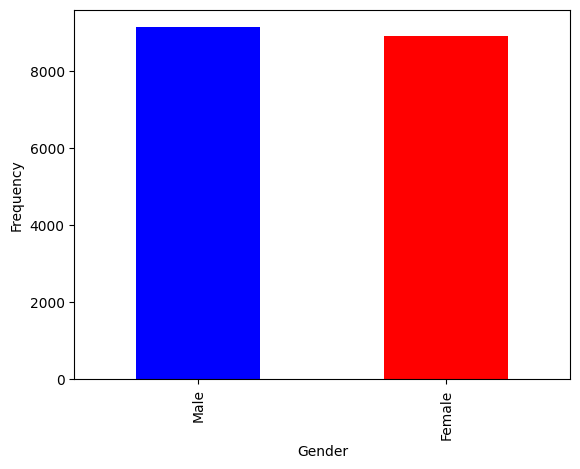

In [75]:
data.Gender.value_counts().plot(kind = 'bar', color = ['blue', 'red'])
plt.ylabel('Frequency')

In [76]:
data.dropna(axis=0, inplace=True)

In [77]:
data.isnull().sum()

CustomerKey       0
Full_name         0
BirthDate         0
MaritalStatus     0
Gender            0
EmailAddress      0
AnnualIncome      0
TotalChildren     0
EducationLevel    0
Occupation        0
HomeOwner         0
(81, Gender)      0
dtype: int64

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18018 entries, 0 to 18147
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerKey     18018 non-null  int64 
 1   Full_name       18018 non-null  object
 2   BirthDate       18018 non-null  object
 3   MaritalStatus   18018 non-null  object
 4   Gender          18018 non-null  object
 5   EmailAddress    18018 non-null  object
 6   AnnualIncome    18018 non-null  object
 7   TotalChildren   18018 non-null  int64 
 8   EducationLevel  18018 non-null  object
 9   Occupation      18018 non-null  object
 10  HomeOwner       18018 non-null  object
 11  (81, Gender)    18018 non-null  object
dtypes: int64(2), object(10)
memory usage: 1.8+ MB


In [79]:
#change BirthDate to datetime format

In [80]:
data['BirthDate'] = pd.to_datetime(data['BirthDate'], format = "%d/%m/%Y")

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18018 entries, 0 to 18147
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CustomerKey     18018 non-null  int64         
 1   Full_name       18018 non-null  object        
 2   BirthDate       18018 non-null  datetime64[ns]
 3   MaritalStatus   18018 non-null  object        
 4   Gender          18018 non-null  object        
 5   EmailAddress    18018 non-null  object        
 6   AnnualIncome    18018 non-null  object        
 7   TotalChildren   18018 non-null  int64         
 8   EducationLevel  18018 non-null  object        
 9   Occupation      18018 non-null  object        
 10  HomeOwner       18018 non-null  object        
 11  (81, Gender)    18018 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 1.8+ MB


In [82]:
data.AnnualIncome = data.AnnualIncome.astype(int)

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18018 entries, 0 to 18147
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CustomerKey     18018 non-null  int64         
 1   Full_name       18018 non-null  object        
 2   BirthDate       18018 non-null  datetime64[ns]
 3   MaritalStatus   18018 non-null  object        
 4   Gender          18018 non-null  object        
 5   EmailAddress    18018 non-null  object        
 6   AnnualIncome    18018 non-null  int32         
 7   TotalChildren   18018 non-null  int64         
 8   EducationLevel  18018 non-null  object        
 9   Occupation      18018 non-null  object        
 10  HomeOwner       18018 non-null  object        
 11  (81, Gender)    18018 non-null  object        
dtypes: datetime64[ns](1), int32(1), int64(2), object(8)
memory usage: 1.7+ MB


In [84]:
data.head()

,CustomerKey,Full_name,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,"(81, Gender)"
0,11000,MR. JON YANG,1966-08-04,Married,Male,jon24@learnsector.com,90000,2,Bachelors,Professional,Yes,Female
1,11001,MR. EUGENE HUANG,1965-05-14,Single,Male,eugene10@learnsector.com,60000,3,Bachelors,Professional,No,Female
2,11002,MR. RUBEN TORRES,1965-12-08,Married,Male,ruben35@learnsector.com,60000,3,Bachelors,Professional,Yes,Female
3,11003,MS. CHRISTY ZHU,1968-02-15,Single,Female,christy12@learnsector.com,70000,0,Bachelors,Professional,No,Female
4,11004,MRS. ELIZABETH JOHNSON,1968-08-08,Single,Female,elizabeth5@learnsector.com,80000,5,Bachelors,Professional,Yes,Female


In [85]:
data.columns

Index([   'CustomerKey',      'Full_name',      'BirthDate',  'MaritalStatus',
               'Gender',   'EmailAddress',   'AnnualIncome',  'TotalChildren',
       'EducationLevel',     'Occupation',      'HomeOwner',   (81, 'Gender')],
      dtype='object')

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18018 entries, 0 to 18147
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CustomerKey     18018 non-null  int64         
 1   Full_name       18018 non-null  object        
 2   BirthDate       18018 non-null  datetime64[ns]
 3   MaritalStatus   18018 non-null  object        
 4   Gender          18018 non-null  object        
 5   EmailAddress    18018 non-null  object        
 6   AnnualIncome    18018 non-null  int32         
 7   TotalChildren   18018 non-null  int64         
 8   EducationLevel  18018 non-null  object        
 9   Occupation      18018 non-null  object        
 10  HomeOwner       18018 non-null  object        
 11  (81, Gender)    18018 non-null  object        
dtypes: datetime64[ns](1), int32(1), int64(2), object(8)
memory usage: 1.7+ MB


## The data is now clean

In [87]:
data.columns

Index([   'CustomerKey',      'Full_name',      'BirthDate',  'MaritalStatus',
               'Gender',   'EmailAddress',   'AnnualIncome',  'TotalChildren',
       'EducationLevel',     'Occupation',      'HomeOwner',   (81, 'Gender')],
      dtype='object')

In [90]:
data.BirthDate.dt.day

0         4
1        14
2         8
3        15
4         8
         ..
18143     7
18144    11
18145     1
18146     3
18147    12
Name: BirthDate, Length: 18018, dtype: int32

In [93]:
data.BirthDate.dt.year

0        1966
1        1965
2        1965
3        1968
4        1968
         ... 
18143    1958
18144    1960
18145    1960
18146    1959
18147    1959
Name: BirthDate, Length: 18018, dtype: int32